# Blob Detection

helpful links

https://stackoverflow.com/questions/14770756/opencv-simpleblobdetector-filterbyinertia-meaning

http://amroamroamro.github.io/mexopencv/opencv/detect_blob_demo.html#3

https://hackthedeveloper.com/blob-detection-opencv-python/

In [1]:
# safe packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [28]:
n_path = 'Data/train/normal/6 - Copy (3).png'
a_path = 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000061.png'
l_path = 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000019 (3).png'
s_path = 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000008 (3).png'

In [21]:
!ls

Data                                    canny_filter_harry.ipynb
LICENSE                                 chest-ctscan-images.zip
README.md                               requirements.txt
blob_detection_harryl.ipynb             setup_notebook.sh
boarder_detection_and_crop_harryl.ipynb venv


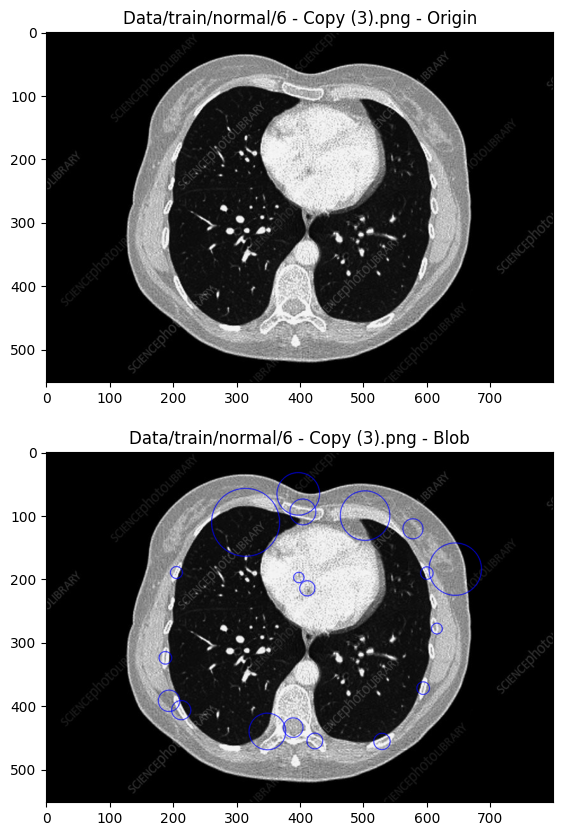

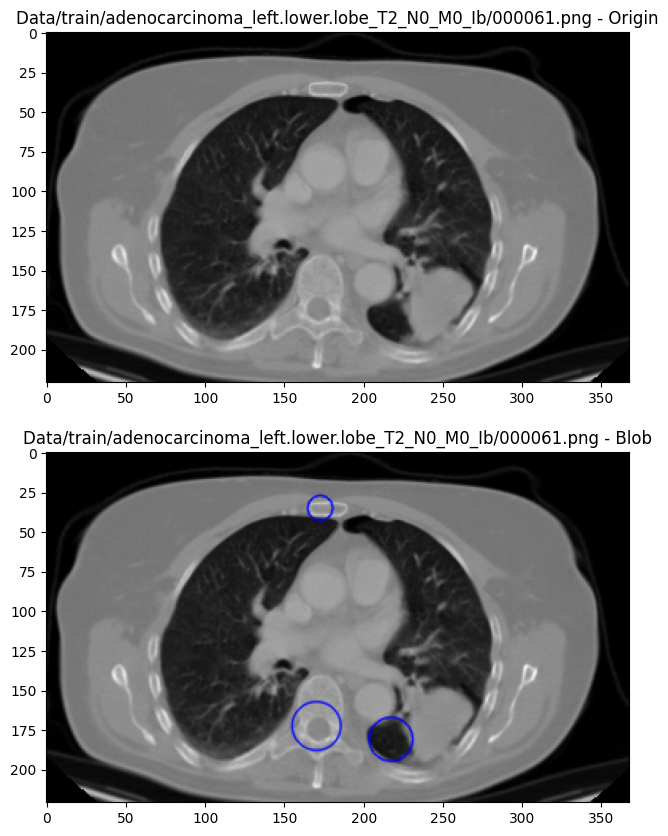

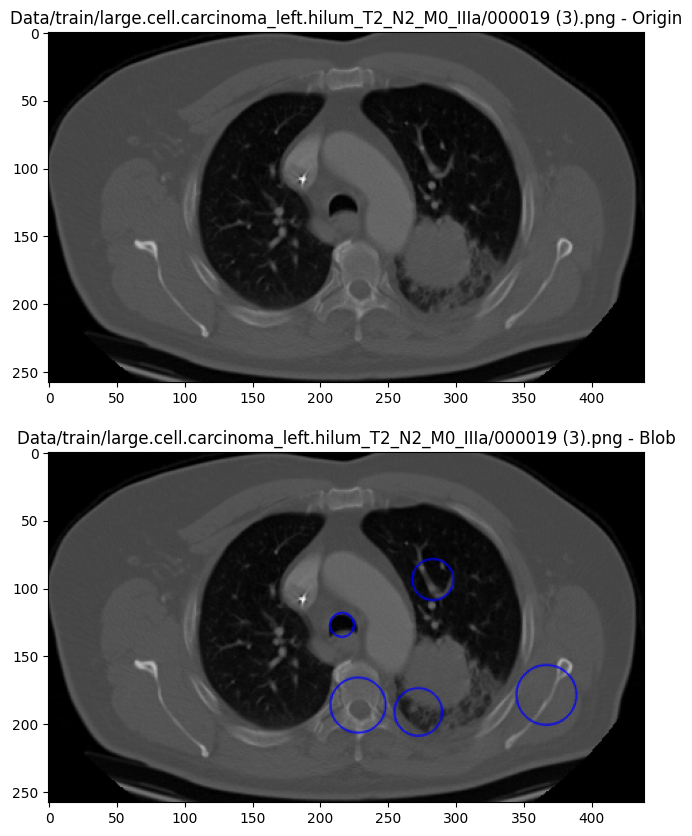

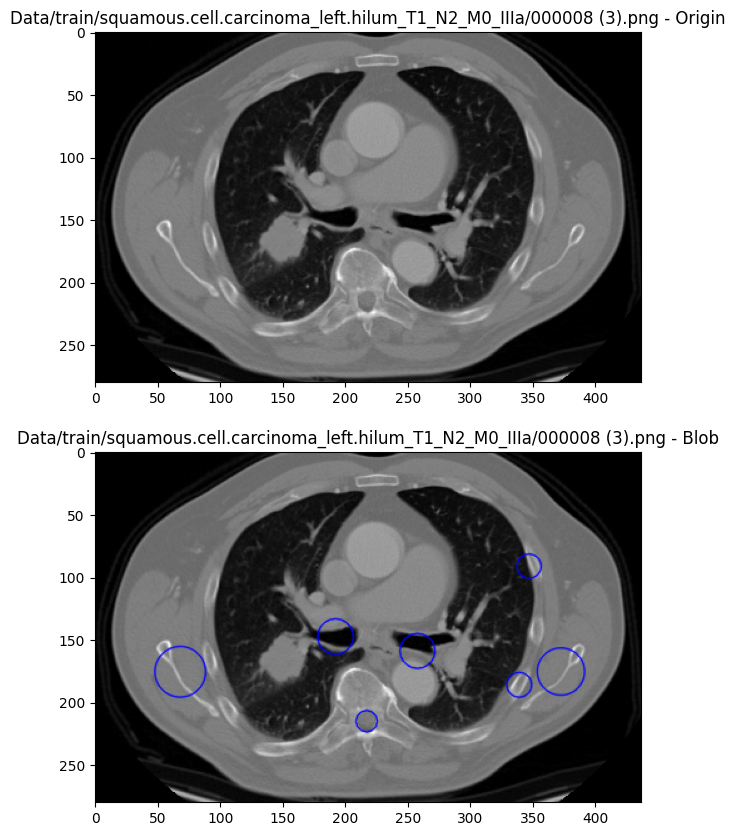

In [34]:


def blob_detection(image_file_path):
    # Read the image from the file path
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    
    # Initialize the SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()
    
    # Change parameters as needed
    params.minThreshold = 10
    params.maxThreshold = 1000
    
    params.filterByArea = True
    params.minArea = 150
    params.maxArea = 2000
    
    params.filterByCircularity = False
    params.minCircularity = 0.9;
    params.maxCircularity = 1e37;
    
    params.filterByInertia = False    
    
    params.filterByConvexity = False
    params.minConvexity = .55
    
    
    # Create a SimpleBlobDetector object with the specified parameters
    detector = cv2.SimpleBlobDetector_create(params)
    
    # Detect blobs in the image
    keypoints = detector.detect(image)
    
    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
    fig, ax = plt.subplots(2,1,figsize=(10,10))
    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].title.set_text(image_file_path + ' - Origin')
    ax[1].imshow(im_with_keypoints, cmap='gray', vmin=0, vmax=255)
    ax[1].title.set_text(image_file_path + ' - Blob')

# Example usage:
blob_detection(n_path)
blob_detection(a_path)
blob_detection(l_path)
blob_detection(s_path)

